#  <center>**Maestría en Ciencia de Datos y Analítica**</center>
## <center>**Algebra de Datos**</center>
### <center>**Autor**:</center>
#### <center>**Sebastian Carvalho Salazar**</center>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

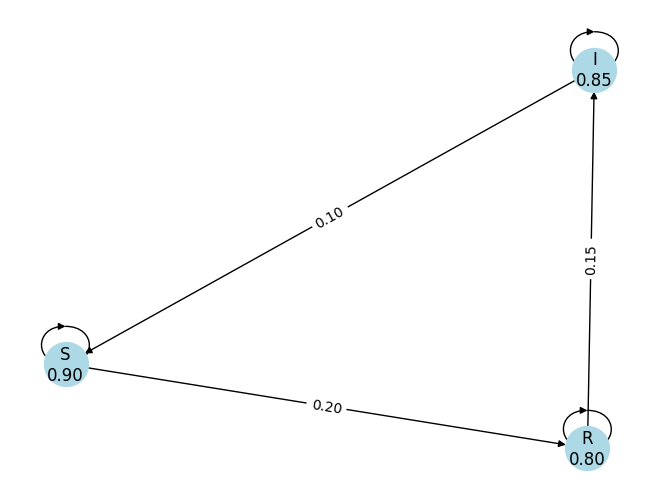

In [3]:
# Definir la matriz de transición
transition_matrix = np.array([[0.9, 0.0, 0.2],
                               [0.1, 0.85, 0.0],
                               [0.0, 0.15, 0.8]])

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos al grafo con etiquetas de permanencia
for i, node_label in enumerate(['S', 'I', 'R']):
    G.add_node(node_label, permanence=transition_matrix[i, i])

# Agregar arcos ponderados al grafo
for i in range(3):
    for j in range(3):
        weight = transition_matrix[i, j]
        if weight > 0:
            G.add_edge(['S', 'I', 'R'][i], ['S', 'I', 'R'][j], weight=weight)

# Dibujar el grafo
pos = nx.spring_layout(G)
labels = {node: f"{node}\n{G.nodes[node]['permanence']:.2f}" for node in G.nodes()}
edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}
nx.draw(G, pos, with_labels=True, labels=labels, node_size=1000, node_color='lightblue')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

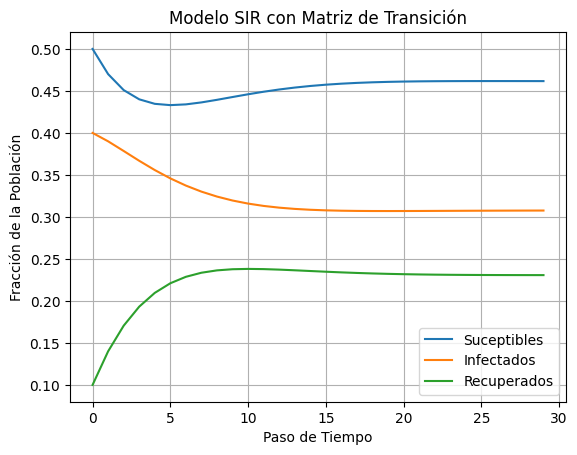

In [4]:
# Condición inicial
initial_state = np.array([0.5, 0.4, 0.1])  # [Suceptibles, Infectados, Recuperados]

# Número total de pasos de tiempo
num_steps = 30

# Arrays para almacenar los valores de S, I y R en cada paso de tiempo
S = [initial_state[0]]
I = [initial_state[1]]
R = [initial_state[2]]

# Simulación del modelo SIR utilizando la matriz de transición
current_state = initial_state.copy()
for step in range(1, num_steps):
    new_state = np.dot(transition_matrix, current_state)
    S.append(new_state[0])
    I.append(new_state[1])
    R.append(new_state[2])
    current_state = new_state

# Crear una lista de pasos de tiempo
t = list(range(num_steps))

# Graficar los resultados
plt.plot(t, S, label='Suceptibles')
plt.plot(t, I, label='Infectados')
plt.plot(t, R, label='Recuperados')
plt.xlabel('Paso de Tiempo')
plt.ylabel('Fracción de la Población')
plt.legend()
plt.title('Modelo SIR con Matriz de Transición')
plt.grid()
plt.show()